In [1]:
import pandas as pd
import numpy as np, numpy.random
from pandas_datareader import data as wb
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import yfinance
from sklearn.cluster import KMeans
import seaborn as sns
from tqdm import tqdm
import random


Bad key text.latex.unicode in file C:\Users\andre\Anaconda35\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.dvipnghack in file C:\Users\andre\Anaconda35\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 127 ("text.dvipnghack : None      # some versions of dvipng don't handle alpha")
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\andre\Anaconda35\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 430 ('savefig.frameon : True')
You probably need to get an updated 

In [2]:
#Ativos pegos no ibrx50

teste = ['ABEV3.SA',
'AZUL4.SA',
'BTOW3.SA',
'B3SA3.SA',
'BBSE3.SA',
'BRML3.SA',
'BBDC4.SA',
'BBAS3.SA',
'BRFS3.SA',
'BPAC11.SA',
'CCRO3.SA',
'CMIG4.SA',
'CIEL3.SA',
'COGN3.SA',
'CVCB3.SA',
'CYRE3.SA',
'ELET3.SA',
'EQTL3.SA',
'GGBR4.SA',
'GOAU4.SA',
'GOLL4.SA',
'NTCO3.SA',
'GNDI3.SA',
'IRBR3.SA',
'ITSA4.SA',
'ITUB4.SA',
'JBSS3.SA',
'KLBN11.SA',
'RENT3.SA',
'LAME4.SA',
'LREN3.SA',
'MGLU3.SA',
'MRFG3.SA',
'MULT3.SA',
'PETR3.SA',
'PETR4.SA',
'BRDT3.SA',
'PRIO3.SA',
'RADL3.SA',
'RAIL3.SA',
'SBSP3.SA',
'CSNA3.SA',
'SULA11.SA',
'SUZB3.SA',
'TOTS3.SA',
'UGPA3.SA',
'USIM5.SA',
'VALE3.SA',
'VVAR3.SA',
'WEGE3.SA']

teste2 =['MGLU3.SA', 'WEGE3.SA', 'TOTS3.SA', 'PRIO3.SA', 'CYRE3.SA']

In [3]:
precos = pd.DataFrame()
for t in teste:
    precos[t]=wb.DataReader(t, data_source='yahoo', start='2018-03-15')['Adj Close']
    print(t) 

ABEV3.SA
AZUL4.SA
BTOW3.SA
B3SA3.SA
BBSE3.SA
BRML3.SA
BBDC4.SA
BBAS3.SA
BRFS3.SA
BPAC11.SA
CCRO3.SA
CMIG4.SA
CIEL3.SA
COGN3.SA
CVCB3.SA
CYRE3.SA
ELET3.SA
EQTL3.SA
GGBR4.SA
GOAU4.SA
GOLL4.SA
NTCO3.SA
GNDI3.SA
IRBR3.SA
ITSA4.SA
ITUB4.SA
JBSS3.SA
KLBN11.SA
RENT3.SA
LAME4.SA
LREN3.SA
MGLU3.SA
MRFG3.SA
MULT3.SA
PETR3.SA
PETR4.SA
BRDT3.SA
PRIO3.SA
RADL3.SA
RAIL3.SA
SBSP3.SA
CSNA3.SA
SULA11.SA
SUZB3.SA
TOTS3.SA
UGPA3.SA
USIM5.SA
VALE3.SA
VVAR3.SA
WEGE3.SA


In [4]:
T_teste_inicio='2020-03-15'
T_teste_fim = '2021-03-15'
precos_na = precos.dropna(axis='columns')
treinamento = precos_na['2018-03-15':'2020-03-14']
teste = precos_na['2020-03-15' : '2021-03-15']

In [5]:
treinamento

,ABEV3.SA,AZUL4.SA,BTOW3.SA,B3SA3.SA,BBSE3.SA,BRML3.SA,BBDC4.SA,BBAS3.SA,BRFS3.SA,BPAC11.SA,...,SBSP3.SA,CSNA3.SA,SULA11.SA,SUZB3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-15,21.918333,36.820000,25.105709,23.697550,21.384949,10.661937,22.906448,36.216133,25.270000,19.881813,...,34.744579,7.078507,20.413057,22.787115,29.173405,33.380993,10.805265,36.876049,7.878345,17.035524
2018-03-16,21.670513,36.410000,25.896441,23.469685,21.545681,10.366540,22.966518,36.224670,25.000000,20.246620,...,35.166168,7.061910,20.522507,27.753538,29.389887,32.986088,10.814964,36.789078,7.958227,17.109346
2018-03-19,21.835730,36.380001,26.548796,23.296511,21.469143,10.292692,22.732231,35.370316,25.000000,20.520224,...,35.211994,6.854452,20.522507,29.798534,29.301258,32.976795,10.281492,35.745411,7.898316,17.116629
2018-03-20,21.743942,36.680000,27.408714,23.752235,21.545681,10.338846,22.708195,35.507004,24.500000,20.429024,...,34.937042,6.987226,20.522507,29.652464,29.173405,32.735207,10.620975,36.180271,7.648685,16.983946
2018-03-21,21.927515,37.490002,27.675587,23.898067,21.729376,10.403465,22.822336,36.096516,24.280001,20.383421,...,35.514442,7.368949,20.203268,30.937891,28.976641,32.893173,10.882862,36.963017,7.768508,17.072430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-09,14.224314,32.099998,49.084045,39.551105,27.073980,13.850000,23.508389,35.771481,20.000000,47.340858,...,50.299160,8.282701,40.314960,37.950001,57.830742,15.059592,6.539114,34.746727,9.580000,39.388870
2020-03-10,13.981910,36.180000,54.734940,44.482899,27.655704,14.290000,24.075071,37.653698,20.840000,49.461773,...,52.930195,9.350471,43.798504,38.860001,61.757519,17.473427,7.054317,41.157833,11.620000,41.529243
2020-03-11,13.332264,30.250000,51.615486,41.146683,26.492258,12.480000,22.127104,34.402599,18.500000,43.809280,...,48.848221,8.003285,39.537651,35.459999,58.207554,16.290941,6.440037,37.419552,11.000000,38.843864


<IPython.core.display.Javascript object>


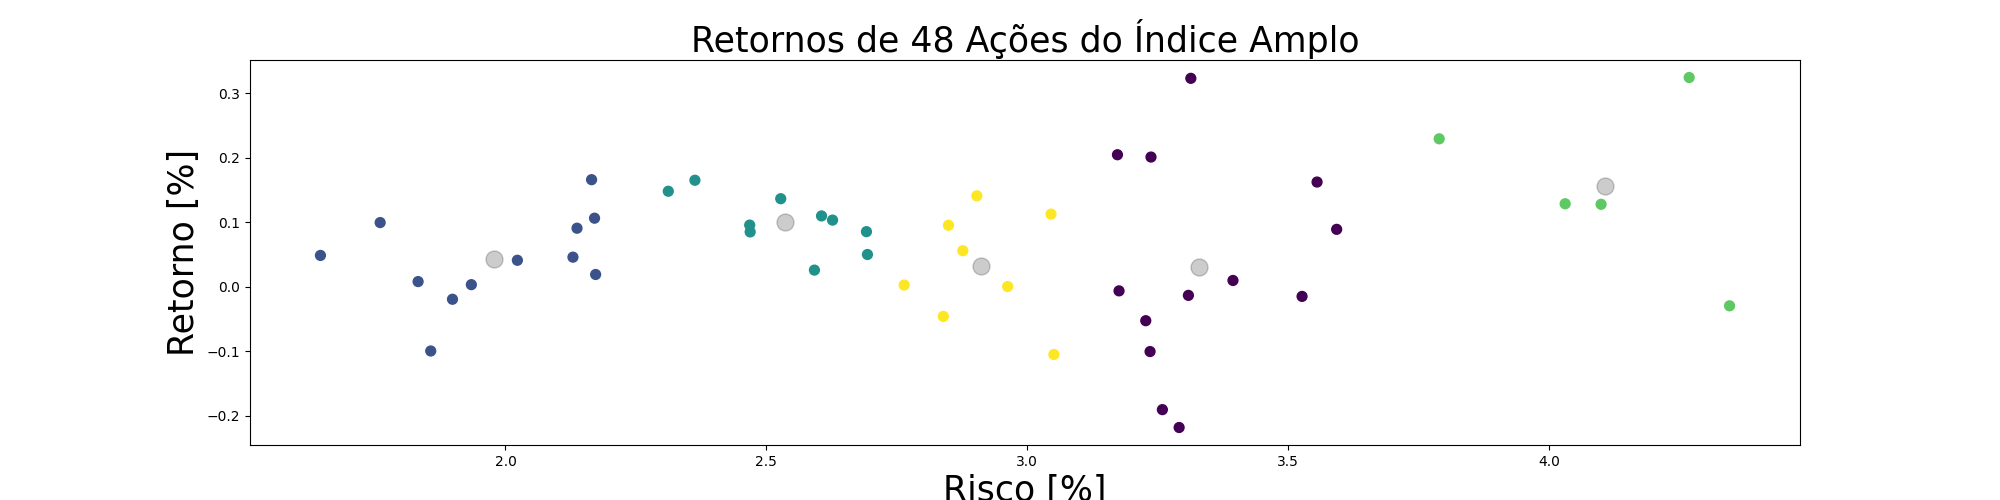

Ativos com Melhor Relação em Cada Cluster: ['MGLU3.SA', 'WEGE3.SA', 'TOTS3.SA', 'PRIO3.SA', 'CYRE3.SA']


In [6]:
retornos=100*treinamento.pct_change()
acoes=retornos.columns

X=np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in acoes])

N=5

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(treinamento.columns))+' Ações do Índice Amplo',fontsize=25)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

melhores=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    melhores.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(melhores).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

In [7]:
melhores

[MGLU3.SA    0.097427
 dtype: float64, WEGE3.SA    0.076575
 dtype: float64, TOTS3.SA    0.069787
 dtype: float64, PRIO3.SA    0.075928
 dtype: float64, CYRE3.SA    0.048478
 dtype: float64]

In [8]:
treinamento_melhores = treinamento[rb]
retorno_melhores=treinamento[rb]
retorno_melhores=100*retorno_melhores.pct_change()
#retorno_melhores=retorno_melhores.dropna(axis='columns')
retorno_melhores=retorno_melhores.dropna()

retorno_melhores

,MGLU3.SA,WEGE3.SA,TOTS3.SA,PRIO3.SA,CYRE3.SA
Date,,,,,
2018-03-16,1.868125,0.433342,0.742053,-2.439026,-0.528064
2018-03-19,-2.157505,0.042563,-0.301562,5.000003,-0.796265
2018-03-20,-0.771760,-0.775169,-0.436341,3.206344,-0.334464
2018-03-21,3.333323,0.520985,-0.674464,-5.259920,0.671149
2018-03-22,2.569884,0.216236,-1.290387,0.048706,0.933327
...,...,...,...,...,...
2020-03-09,-10.964042,-9.700140,-10.194032,-36.540630,-16.684686
2020-03-10,16.427159,5.433954,6.790120,13.517123,8.866774
2020-03-11,-8.320923,-6.466236,-5.748231,-8.695657,-3.456493



Preços [R$]:
            MGLU3.SA   WEGE3.SA   TOTS3.SA  PRIO3.SA   CYRE3.SA
Date                                                           
2018-03-15  2.745664  17.035524  29.173405     6.150  12.067400
2018-03-16  2.796956  17.109346  29.389887     6.000  12.003676
2018-03-19  2.736612  17.116629  29.301258     6.300  11.908095
2018-03-20  2.715492  16.983946  29.173405     6.502  11.868267
2018-03-21  2.806008  17.072430  28.976641     6.160  11.947921

Retornos [%]:
            MGLU3.SA  WEGE3.SA  TOTS3.SA  PRIO3.SA  CYRE3.SA
Date                                                        
2018-03-16  1.868125  0.433342  0.742053 -2.439026 -0.528064
2018-03-19 -2.157505  0.042563 -0.301562  5.000003 -0.796265
2018-03-20 -0.771760 -0.775169 -0.436341  3.206344 -0.334464
2018-03-21  3.333323  0.520985 -0.674464 -5.259920  0.671149

Covariancia [%]:
           MGLU3.SA  WEGE3.SA  TOTS3.SA   PRIO3.SA  CYRE3.SA
MGLU3.SA  11.002804  3.055692  3.496653   5.310673  5.768878
WEGE3.SA   3.0556

<IPython.core.display.Javascript object>


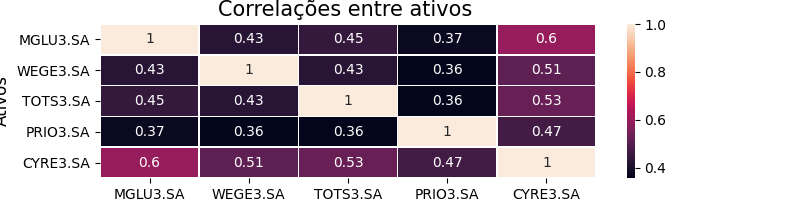

Text(0.5, 1.0, 'Correlações entre ativos ')

In [9]:



retorno_melhores.columns=list([rb])

C=retorno_melhores.cov()

sig=retorno_melhores.std()

I=pd.DataFrame(np.identity(len(C)))

SIGMA=(C*(I.values))**0.5

P=retorno_melhores.corr()

print()
print("Preços [R$]:")
print(treinamento_melhores.head())
print('')
print("Retornos [%]:")
print(retorno_melhores.head(4))
print('')
print("Covariancia [%]:")
print(C)
print('')
print("Matriz de Volatilidade [%]:")
print(SIGMA)
print()
f, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(P, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Ativos",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Correlações entre ativos ",fontsize=15)

<IPython.core.display.Javascript object>


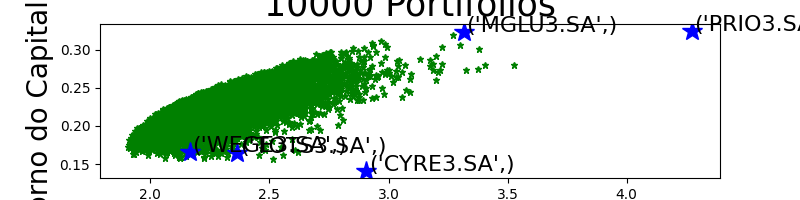

Text(0.5, 1.0, 'Correlações entre ativos ')

In [10]:
f, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(P, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Ativos",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Correlações entre ativos ",fontsize=15)

In [11]:
def Portfolios(ret,ports):
    retp=[]
    risp=[]
    pesos=[]
    C=ret.cov()
    MU=ret.mean()
    SIG=ret.std()
    N=len(ret.columns)
    for i in tqdm(range(ports)):
        q = [random.randint(0,10000) for i in range(1,N+1)]
        s = sum(q)
        q = [ i/s for i in q ]

        pesos.append(q)
        retp.append(np.dot(pd.DataFrame(q).transpose(),MU)[0])
        risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])
    return retp, risp, SIG, MU, pesos
    
retp, risp, SIG, MU, pesos = Portfolios(retorno_melhores,10000)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:37<00:00, 267.96it/s]


In [12]:
ax1=plt.subplot(1,1, 1)     
for p in range(0,len(retp)):
    ax1.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#    ax1.text(100*(sig[p]+0.001), 100*MU[p],df.columns[p], fontsize=8)

for p in range(0,len(SIG)):
    ax1.plot(SIG[p], MU[p], 'b*', markersize=15.0) 
    ax1.text(SIG[p]+0.01, MU[p],retorno_melhores.columns[p] , fontsize=16)

ax1.set_ylabel("Retorno do Capital [%]",fontsize=20)
ax1.set_xlabel("Risco do Capital [%]",fontsize=20)
ax1.set_title(str(len(retp))+" Portifolios",fontsize=25)

Text(0.5, 1.0, '10000 Portifolios')

In [13]:

dfgraph=pd.DataFrame()
dfgraph['Retorno Port.']=retp
dfgraph['Risco Port']=risp
j=0
for i in rb:
    pesosT = []
    for t in pesos:
        pesosT.append(t[j])
    j=j+1    
    dfgraph[i]=pesosT


In [14]:
dfgraph

,Retorno Port.,Risco Port,MGLU3.SA,WEGE3.SA,TOTS3.SA,PRIO3.SA,CYRE3.SA
0,0.216884,2.187944,0.056229,0.292383,0.352677,0.271747,0.026964
1,0.206950,2.212174,0.209349,0.189913,0.202503,0.099350,0.298886
2,0.234538,2.395827,0.361126,0.075733,0.191052,0.116030,0.256059
3,0.255947,2.516296,0.204274,0.195175,0.162421,0.375887,0.062243
4,0.248632,2.430131,0.237977,0.268203,0.064381,0.305515,0.123925
...,...,...,...,...,...,...,...
9995,0.244868,2.268203,0.333836,0.353819,0.070550,0.177323,0.064472
9996,0.213218,2.337401,0.284830,0.014943,0.319509,0.067019,0.313698
9997,0.240415,2.597261,0.187087,0.156794,0.022780,0.331972,0.301367
9998,0.190808,2.095388,0.128915,0.211324,0.322617,0.072538,0.264607


In [15]:
min_std=dfgraph.sort_values(by='Risco Port', ascending=True)
min_std

,Retorno Port.,Risco Port,MGLU3.SA,WEGE3.SA,TOTS3.SA,PRIO3.SA,CYRE3.SA
1823,0.172517,1.907107,0.014844,0.529581,0.364748,0.037164,0.053663
8401,0.181794,1.908759,0.082327,0.511154,0.345989,0.025686,0.034844
3010,0.175259,1.911535,0.038188,0.458364,0.407481,0.033016,0.062951
2177,0.170652,1.912926,0.014664,0.562493,0.310918,0.029786,0.082140
1503,0.172805,1.913221,0.025741,0.457176,0.404630,0.032546,0.079907
...,...,...,...,...,...,...,...
686,0.273633,3.325561,0.004281,0.166269,0.016002,0.694062,0.119385
8109,0.274128,3.375272,0.046583,0.027542,0.016831,0.673580,0.235464
5000,0.300986,3.380246,0.159496,0.029801,0.084680,0.698531,0.027492
9160,0.280397,3.404509,0.006652,0.032648,0.176748,0.725617,0.058336


In [16]:
pesos_min=pd.Series(min_std.iloc[0])
pesos_min

Retorno Port.    0.172517
Risco Port       1.907107
MGLU3.SA         0.014844
WEGE3.SA         0.529581
TOTS3.SA         0.364748
PRIO3.SA         0.037164
CYRE3.SA         0.053663
Name: 1823, dtype: float64

In [17]:
teste_melhores = teste[rb]
retorno_teste = teste_melhores.pct_change()

In [18]:
del min_std['Retorno Port.']
del min_std['Risco Port']

In [19]:
pesos_min=pd.Series(min_std.iloc[0])
retorno_min=retorno_teste*pesos_min
historico=retorno_min.sum(axis=1)
historico_acumulado=(1+historico).cumprod()
historico_acumulado.iloc[0]=1

In [20]:
historico_acumulado

Date
2020-03-16    1.000000
2020-03-17    1.030838
2020-03-18    0.905429
2020-03-19    0.950893
2020-03-20    1.028032
                ...   
2021-03-08    1.777725
2021-03-09    1.835484
2021-03-10    1.815817
2021-03-11    1.801673
2021-03-12    1.795847
Length: 244, dtype: float64

In [21]:
bovespa = pd.DataFrame()
bovespa=wb.DataReader('^BVSP', data_source='yahoo', start=T_teste_inicio,end=T_teste_fim)['Adj Close']
pct_bovespa = bovespa.pct_change()
ibov_acumulado=(1+pct_bovespa).cumprod()
ibov_acumulado.iloc[0]=1
#ibov_acumulado.drop(ibov_acumulado.tail(1).index, inplace = True) 

In [22]:
ibov_acumulado

Date
2020-03-16    1.000000
2020-03-17    1.048463
2020-03-18    0.939959
2020-03-19    0.960151
2020-03-20    0.942404
                ...   
2021-03-09    1.564341
2021-03-10    1.584645
2021-03-11    1.615670
2021-03-12    1.604092
2021-03-15    1.613801
Name: Adj Close, Length: 245, dtype: float64

In [23]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  PG = pd.read_json(url)
  df=pd.DataFrame(PG)  
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

cdi=consulta_bc(12)
cdi_acumulado=(1+cdi[cdi.index>=T_teste_inicio]/100).cumprod()
cdi_acumulado.iloc[0]=1
#cdi_acumulado.drop(cdi_acumulado.tail(1).index, inplace = True) 

In [24]:
cdi_acumulado

,valor
data,
2020-03-16,1.000000
2020-03-17,1.000323
2020-03-18,1.000484
2020-03-19,1.000627
2020-03-20,1.000769
...,...
2021-03-09,1.022509
2021-03-10,1.022586
2021-03-11,1.022662


<IPython.core.display.Javascript object>


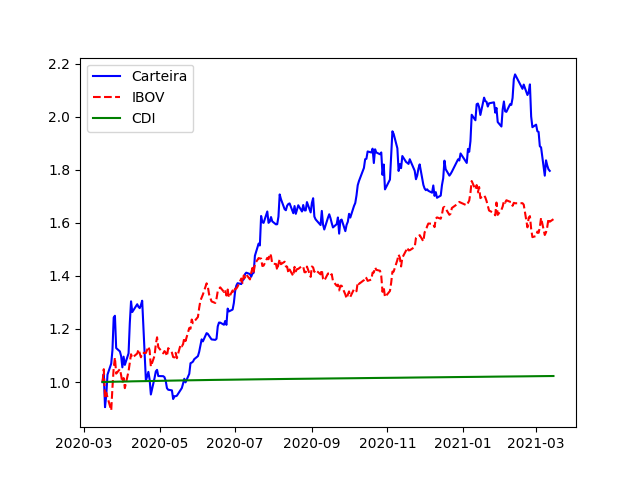

In [25]:
fig, ax = plt.subplots()
ax.plot(historico_acumulado,  '-b', label='Carteira')
ax.plot(ibov_acumulado,  '--r', label='IBOV')
ax.plot(cdi_acumulado,  '-g', label='CDI')
leg = ax.legend();

In [26]:
rs = 100000
historico_acumulado = historico_acumulado*rs
ibov_acumulado = ibov_acumulado*rs
cdi_acumulado =cdi_acumulado*rs

In [27]:
historico_acumulado

Date
2020-03-16    100000.000000
2020-03-17    103083.770177
2020-03-18     90542.900116
2020-03-19     95089.339067
2020-03-20    102803.247867
                  ...      
2021-03-08    177772.529838
2021-03-09    183548.353055
2021-03-10    181581.663213
2021-03-11    180167.296686
2021-03-12    179584.708821
Length: 244, dtype: float64

<IPython.core.display.Javascript object>


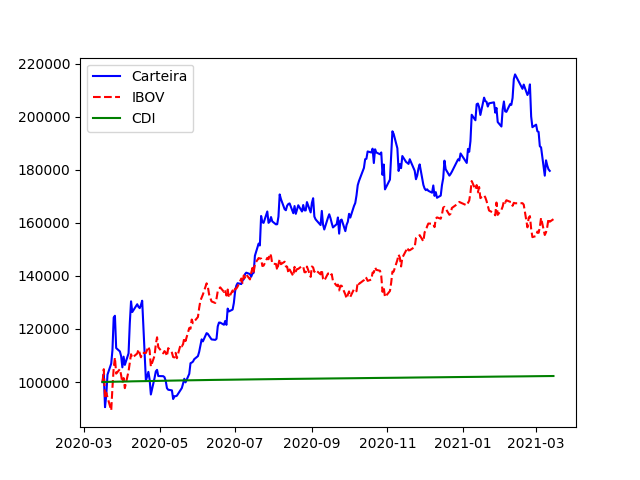

In [28]:
fig, ax = plt.subplots()
ax.plot(historico_acumulado,  '-b', label='Carteira')
ax.plot(ibov_acumulado,  '--r', label='IBOV')
ax.plot(cdi_acumulado,  '-g', label='CDI')
leg = ax.legend();